# Ejemplo práctico del PSD

Tenemos una señal definida por: 

$$
x(t) = sin(2\pi*5t) + 0.5*sin(2\pi*20t) + n(t)
$$

Donde tenemos: 

* Componente a 5 Hz con una amplitud de 1
* Componente a 20 Hz con una amplitud de 0.5
* n(t), que es ruido blanco gaussiano

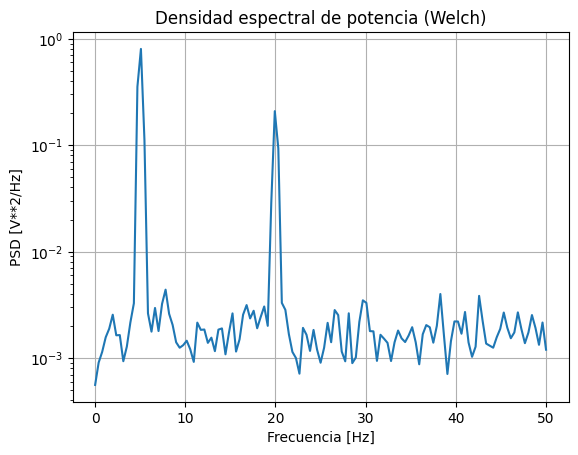

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal

# Parámetros de la señal 
fs = 100        # Frecuencia de muestreo (Hz) 
T = 10           # Duración en segundos 
t = np.linspace(0, T, fs*T, endpoint=False)

# Señal: suma de senoidales + ruido blanco
x = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*20*t) + np.random.normal(0, 0.3, len(t))

# restamos la media antes de aplicar el Welch para quitar el pico en DC
x = x - np.mean(x)

# Aplicamos Welch
f, Pxx = signal.welch(x, fs, nperseg=256)

# Plot 
plt.figure()
plt.semilogy(f, Pxx)
plt.title('Densidad espectral de potencia (Welch)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid(True)
plt.show()


En la gráfica podemos ver: 

* Pico alto en 5Hz. Mayor amplitud, lleva a más potencia y a un pico más dominante. 
* Pico menor en 20Hz. Amplitud menor, y por ende, potencia menor. 
